In [1]:

import pandas as pd

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

In [8]:
df = pd.read_csv("ELS_data_1.csv").drop("Unnamed: 0",axis=1)


In [ ]:
def get_els_figure(df):
    x = df["Time"].to_numpy()
    y = range(63)
    z = df.drop("Time",axis=1).to_numpy().transpose()

    fig, ax  =plt.subplots(figsize=(10,10))
    minmax = (1,6e4)
    ax.pcolormesh(x,y,z,shading="nearest",norm=LogNorm(vmin=minmax[0], vmax=minmax[1]))
    return fig

In [27]:
x = df["Time"].to_numpy()
y = range(63)
z = df.drop("Time",axis=1).to_numpy().transpose()

NameError: name 'cax' is not defined

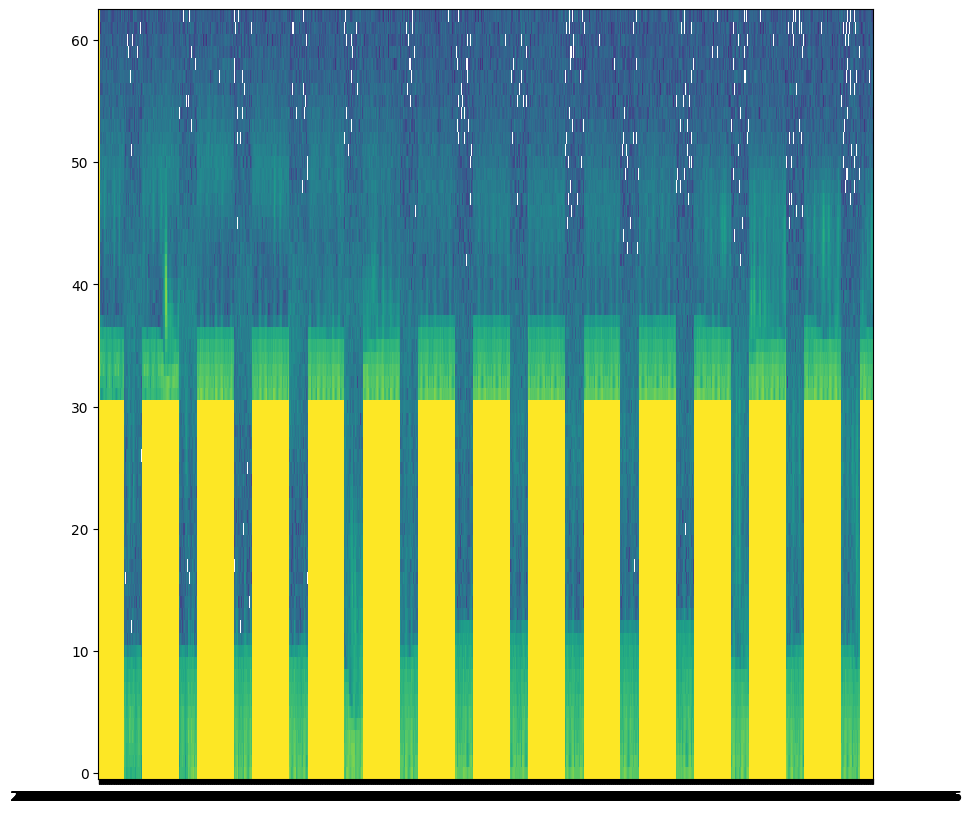

In [29]:
fig,ax  =plt.subplots(figsize=(10,10))
minmax = (1,6e4)
ax.pcolormesh(x,y,z,shading="nearest",norm=LogNorm(vmin=minmax[0], vmax=minmax[1]))
# cbar = fig.colorbar(cm.ScalarMappable(norm=LogNorm(vmin=minmax[0], vmax=minmax[1]), cmap='jet'), cax=cax)
# cbar.set_label("Counts/sec")

In [ ]:
def els_spectrogram(data, ax=None, cax=None, fig=None):
    """
    Plot spectrogram of ELS data

    Note: Not intended to be called by user

    :param anode:
    :param starttime:
    :param endtime:
    :param minmax:
    :param ax:
    :return:
    """

    x = data["Time"]
    y = range(capselsdata.shape[1])
    z = np.transpose(capselsdata.to_dataframe())

    maxvalue = capselsdata.to_dataframe().max().max()
    CS = ax.pcolormesh(x, y, z, norm=LogNorm(vmin=minmax[0], vmax=minmax[1]), cmap='jet')
    if fig is not None:
        cbar = fig.colorbar(cm.ScalarMappable(norm=LogNorm(vmin=minmax[0], vmax=minmax[1]), cmap='jet'), cax=cax)
        cbar.set_label("Counts/sec")

    ax.set_ylabel("CAPS ELS \nAnode {0} \nEnergy Bins ".format(anode))
    return CS, maxvalue


def els_spectrogram(starttime, endtime, anodes, minmax=(1, 2e6), subplot_kw={}):
    """
    Plot spectrogram of ELS data

    """
    if len(set(anodes).difference(set(range(1, 9, 1)))) is not 0:
        raise ValueError
    fig, axes = plt.subplots(nrows=len(anodes), subplot_kw=subplot_kw)
    specaxes = [axes] if not hasattr(axes, "__iter__") else axes
    for subplotcounter, anode in enumerate(anodes):
        base_els_spectrogram(starttime, endtime, anode, minmax, ax=specaxes[subplotcounter])

    fig.subplots_adjust(right=0.9)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
    cbar = fig.colorbar(cm.ScalarMappable(norm=LogNorm(vmin=minmax[0], vmax=minmax[1]), cmap='jet'), cax=cbar_ax)
    cbar.set_label("Counts/sec")